# Возможности работы в экосистеме `Hugging Face`

## Введение


### Методология __OSEMN__

OSEMN — это общая методология решения задачи в Data Science.

Методология по существу состоит из 5 шагов. 
5 шагов могут быть представлены 3 ролями:
* Data Engineer — работа с большими данными, получение, очистка, хранение данных и формирование датасета под требования задачи.
* Data Analyst — анализ задачи от ее технической (бизнес) постановки до ее решения в области data science, а также интерпретация результатов. 
* Data Scientist — решение задач на основе данных, в т. ч. обучение моделей ИИ.

К 5 шагам могут быть добавлены еще два, относящиеся к области внедрения результатов. За реализацию этих шагов отвечают т. н. ML Engineers.

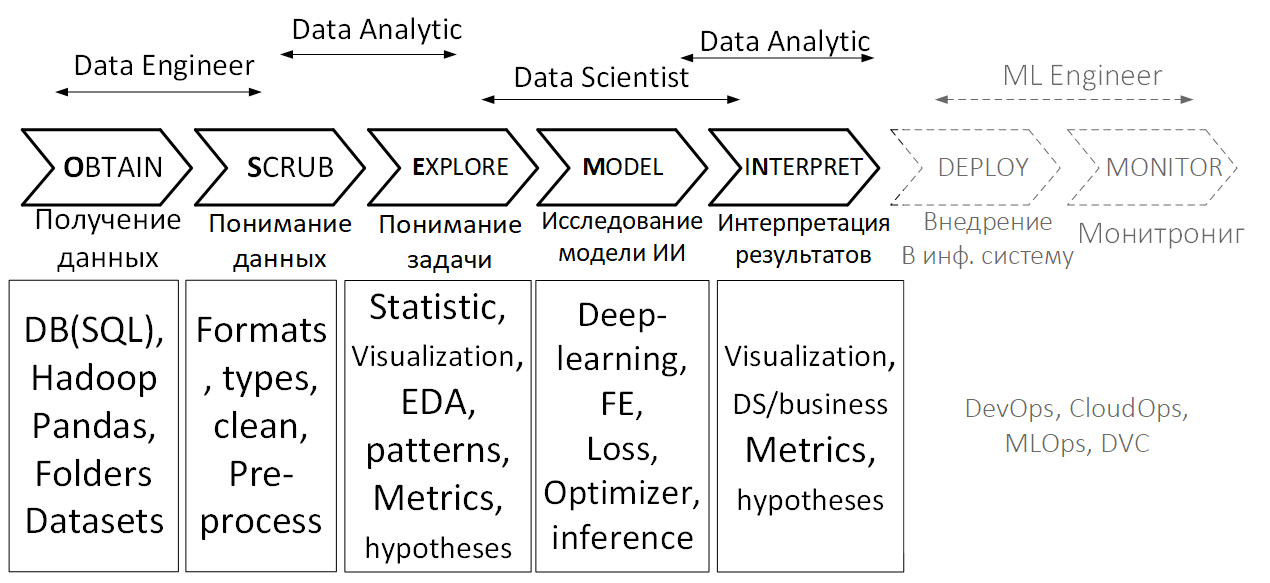

## Виды переноса обучения

В стандартной практике работы в data science собственноручно написанные модели используются редко. Как правило, пользуются уже предобученными моделями. Это связано с несколькими факторами, среди них перечислим следующие:
* Отсутствие достаточно большого набора данных для качественного обучения моделей «с нуля».
* Отсутствие достаточных вычислительных ресурсов для качественного обучения больших моделей «с нуля».
* Классы данных предварительно обученной модели во многом совпадают с целевыми данными или включают их как подмножество (схожесть домена).
> Отметим, что даже в отсутствии схожести домена предобученные нейронные сети являются хорошей инициализацией для работы с моделью. Поэтому готовые, хорошо зарекомендовавшие себя модели лучше использовать «подготовленными» для набора данных. Более того, известно, что в сверточных моделях нижние слои больше выделяют классонезависимые признаки, а с формированием признаков классов работают верхние слои кодировщика.

В зависимости от выбора перечисленных причин использования готовых архитектур могут быть различные стратегии их обучения. Иллюстрация некоторых стратегий приведена ниже:  

![image.png](attachment:f9b6aeb9-99eb-4d83-b812-8d870347a162.Общая идея [заключается в том](https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras), что чем больше разница в доменах, тем больше должно быть данных и тем больше слоев сети (от окончания к началу), которые должны быть обучены. Однако нужно отметить, что слишком большое число удаленных слоев может привести к эффекту появления «переобучения» в предобученной архитектуре. Поэтому нужное число слоев должно быть определено эмпирически.

Среди стратегий использования готовых моделей можно выделить следующие:
* __Использование полностью готовой модели__, если известно, что целевой класс попадает в набор данных предобучения (__`Pretrained network`__).
* __Использование готового кодировщика признаков__, переобучение только головной части (__`Transfer learning`__). Эта наиболее частая стратегия, предполагающая, что задача попадает в домен предобучения, поэтому признаки будут релевантны. Но для конкретного набора данных необходимо обучить слои принятия решений (головную часть). При таком дообучении значения параметров кодировщика признаков фиксируются (т.н. `freeze`).
* __Использование предобученной архитектуры как инициализации параметров__ для целевого обучения (__`fine tuning`__). При этом часть параметров кодировщика может быть фиксирована. Например, могут быть фиксированы нижние слои или все, кроме параметров нормализации.зации.

## Где брать готовые модели


| **Расположение** | **Что здесь?** | **Ссылка(и)** | 
| ----- | ----- | ----- |
| **Библиотеки домена PyTorch** | Каждая из библиотек домена PyTorch (напр.,`torchvision`) поставляется с предварительно обученными моделями в той или иной форме. Модели в них работают прямо в PyTorch. | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [`torchhub`](https://pytorch.org/hub/), |
| **HuggingFace Hub** | Большой набор предварительно обученных моделей для различных доменов, в том числе компьютерное зрение и мультимодальных архитектур от организаций по всему миру. Также есть множество различных наборов данных. | https://huggingface.co/models, https://huggingface.co/datasets | 
| **`timm` (PyTorch Image Models) библиотека** | Почти все самые последние и лучшие модели компьютерного зрения в коде PyTorch, а также множество других полезных функций компьютерного зрения. | https://github.com/rwightman/pytorch-image-models|
| **Paperswithcode** | Коллекция последних статей по машинному обучению с приложенным кодом. Здесь также можно найти эталоны производительности моделей в различных задачах. | https://paperswithcode.com/ | 
| **ultralytics** | индустриальные модели машинного обучения, в основом YOLO. |https://docs.ultralytics.com/ | 

## Где брать датасеты


Затрагивая тему данных, важно отметить __о возможных источниках поиска открытых данных__. Среди таких источников укажем следующие.
* [__`torchvision.datasets`__](https://pytorch.org/vision/main/datasets.html) — коллекция наборов данных по компьютерному зрению от `PyTorch`. Сегодня `PyTorch` предоставляет аналогичный функционал для [текстов](https://pytorch.org/text/stable/datasets.html) и [аудиофайлов](https://pytorch.org/audio/stable/datasets.html).
* __Библиотека [`Datasets`](https://huggingface.co/docs/datasets/en/index)__ от Hugging Face и [datasets hub](https://huggingface.co/datasets) — один из наиболее популярных и быстрорастущих источников данных.
* Коллекция наборов данных — бенчмарков от [__paperswithcode__](https://paperswithcode.com/datasets).
* Коллекция наборов данных к соревнованиям от [__Kaggle__](https://www.kaggle.com/datasets).
* __Поисковик наборов данных от [Google](https://datasetsearch.research.google.com/)__, также иногда наборы данных публикуют на [__GitHub__](https://github.com/).
* Коллекции специализированных данных, например [__physionet__](https://physionet.org/).
* Наборы данных к научным исследованиям от [__Mendeley Data__](https://data.mendeley.com/), [__Zenodo__](https://zenodo.org/), [Roboflow](https://public.roboflow.com/) и [__IEEE DataPort__](https://ieee-dataport.org/), а также наборы данных, публикуемые в научных изданиях (так как имеют научную значимость сами по себе), например издание [__Scientific Data__](https://www.nature.com/sdata/), [__MDPI Data__](https://www.mdpi.com/journal/data) и другие.

Также важно отметить, что в данном уроке __не рассматриваются вопросы разметки данных__. Разметка данных, как правило, проводится или в полуручном режиме (если это проще), или на сторонних сервисах, например:
* [`LabelMe`](https://github.com/labelmeai/labelme),
* [`CVAT`](https://www.cvat.ai/),
* [`Roboflow`](https://docs.roboflow.com/annotate/annotation-tools),
* или [других](https://www.basic.ai/blog-post/top-10-best-data-annotation-data-labeling-tools-2024).

> Также отметим, что помимо аннотирования важно понимать необходимость управления данными при их пополнении. Эта процедура может быть названа [data management](https://fullstackdeeplearning.com/course/2022/lecture-4-data-management/).

## Фреймворки для обучения нейронных сетей

[[Необходимость фреймворков связана с](https://softwaremill.com/ml-engineer-comparison-of-pytorch-tensorflow-jax-and-flax/#analysis):
1. __набором стандартных блоков__ для прототипирования нейронных сетей: (слои, модели, обучение НС, работа НС, работа с данными);
2. __автоматизированной high api процедурой обучения__ — процедура обратного распространения ошибки. В фреймворках обучения НС эта процедура автоматическая и не требует лишнего кодинга;
3. __оптимальной работой с вычислителями__ — работа с CPU/GPU/MPS/TPU и т. д. в единых high api процедурах, параллелизм вычислителей.

Рассмотрим некоторые [из популярных фреймворков](https://developer.nvidia.com/deep-learning-frameworks).
| **Фреймворк** | **Что здесь?** | **Ссылка(и)** | 
| ----- | ----- | ----- |
| **PyTorch + Lightning** | Наиболее популярный фреймворк, широкое сообщество, экосистема | [https://pytorch.org/](https://pytorch.org/), [pytorch-lightning](https://github.com/Lightning-AI/pytorch-lightning) |
| **Tensorflow + Keras** | Когда-то популярный фреймворк, есть удобные high api [__keras__](https://keras.io/), есть удобная система реализации на конечных устройствах | [www.tensorflow.org/](https://www.tensorflow.org/), [keras](https://keras.io/) |
| **JAX + Flax** | Один из наиболее современных фреймворков, сообщество собирается | [jax](https://jax.readthedocs.io/en/latest/quickstart.html) |
| **MXNet + Gluon** | Инструменты Apache, ограниченное сообщество | [mxnet.apache.org](https://mxnet.apache.org/versions/1.9.1/) |
| **HuggingFace** | Коллекция инструментов для современного ИИ, в основном всё на PyTorch | https://huggingface.co/ | 
| **ultralytics** | Индустриальные модели машинного обучения, в основном YOLO, в основном всё на PyTorch. |https://docs.ultralytics.com/ | 

[На самом деле стек технологий для ИИ проектов куда шире](https://fullstackdeeplearning.com/course/2022/lecture-2-development-infrastructure-and-tooling/)

<img src="https://fullstackdeeplearning.com/course/2022/lecture-2-development-infrastructure-and-tooling/media/image15.png" width="900px">

* Из всего указанного мы выберем проект на экосистеме [<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/2560px-PyTorch_logo_black.svg.png" width="200px">](https://pytorch.org/).
* Для упрощения работы с моделями выберем high-api [`Lightning` <img src="https://avatars.githubusercontent.com/u/98025367?s=200&v=4" width="100px">](https://github.com/Lightning-AI/pytorch-lightning).
* Также воспользуемся библиотекой [`TorchMetrics`](https://github.com/Lightning-AI/torchmetrics) для оценки метрик.
* Попробуем вызвать готовые модели из разных фреймворков для обучения.  


## Импорт

Базовые шаги для настройки `jupyter`

In [77]:
%load_ext autoreload
%autoreload 2

import ssl
ssl._create_default_https_context = ssl._create_stdlib_context 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Базовые библиотеки

In [78]:
import os
import time
import random
import platform
import requests
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

`Torch` и его компоненты

In [79]:
import torch
from torch import nn
import torch.utils.data 
import torch.nn.functional as F

`Torchvision` - Специальные компоненты `Torch` для компьютерного зрения.

In [80]:
import torchvision 
from torchvision import transforms, datasets
from torchvision.datasets.utils import download_and_extract_archive

вспомогательные утилиты

In [81]:
import urllib.request
from pprint import pprint
from torchinfo import summary
from tqdm.notebook import tqdm, trange
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Коллекция моделей `timm`

In [82]:
import timm

Особенность `Hugging Face` - отдельные классы под отдельные семейства моделей

In [83]:
from transformers import MobileViTForImageClassification

[`Pytorch-Lightning`](https://pytorch-lightning.readthedocs.io/en/1.7.7/starter/installation.html) - Библиотеки над Pytorch для упрощения работы.

In [84]:
import lightning as pl
from lightning.pytorch.loggers import CSVLogger
from torchmetrics.classification import  Accuracy

Вспомогательные утилиты скачаем в виде внешней коллекции [`utilitsFDLC.py`](https://github.com/MVRonkin/Deep-Learning-Foundation-Course/blob/main/2024_Demo/utilitsFDLC.py)

In [85]:
if not os.path.exists('utilitsFDLC.py' ):
    url = "https://github.com/MVRonkin/Deep-Learning-Foundation-Course/raw/refs/heads/main/2024_Demo/utilitsFDLC.py"
    filename, headers = urllib.request.urlretrieve(url,filename='utilitsFDLC.py' )

In [86]:
from utilitsFDLC import *

Платформа и директория для набора данных и логов.

In [87]:
root_directory = set_root()
root_directory

WindowsPath('D:/data')

Выбираем устройства для работы, а также оценим некоторые особенности производительности нашего вычислителя.


In [88]:
logger=CSVLogger(save_dir=root_directory/'Log')

In [89]:
device, num_workers = torch_set_device()
torch.set_default_device(device)
g = torch.Generator(device = device)

torch version: 2.4
Using device: cpu
available number of workers: 4


Для большей воспроизводимости экспериментов.

In [90]:
pl.seed_everything(42, workers=True)

Seed set to 42


42

# Перенос обучения для задачи классификации в `HF`

## Загрузка данных при помощи бибилотеки `datasets`

В данном примере воспользуемся изученным ранее набором данных «деревья с улиц» ([The Tree Dataset of Urban Street](https://ytt917251944.github.io/dataset_jekyll/)  [Urban street tree dataset for image classification and instance segmentation](https://www.sciencedirect.com/science/article/pii/S0168169923002405?via%3Dihub)).

Загрузку данных произведем при помощи функции `download_and_extract_archive` из библиотеки `torchvision`.

<img src="https://ytt917251944.github.io/dataset_jekyll/assets/img/class/classification-tree.png" width="400px">

Скачаем набор данных, если этого еще не произошло.

In [91]:
url = 'https://github.com/MVRonkin/Deep-Learning-Foundation-Course/raw/refs/heads/main/2024_Demo/tree.zip'

archive_name = url.split('/')[-1]
dataset_directory =root_directory / archive_name
dataset_directory = Path(os.path.splitext(dataset_directory)[0])

if not os.path.exists(dataset_directory):
    download_and_extract_archive(url, root_directory)
    
list(dataset_directory.iterdir())

[WindowsPath('D:/data/tree/test'),
 WindowsPath('D:/data/tree/train'),
 WindowsPath('D:/data/tree/val')]

Зададим директорию с набором данных.

Структура набора данных.

In [92]:
pprint(os.listdir(dataset_directory))
pprint(os.listdir(dataset_directory /'train'))

['test', 'train', 'val']
['Acer',
 'Cedrus',
 'Celtis',
 'Cherry',
 'Cinnamomum',
 'Elaeocarpus',
 'Ginkgo',
 'Koelreuteria',
 'Lagerstroemia']


Зададим преобразования данных.

`PyTorch` позволяет производить преобразования входных данных при помощи класса `transforms.Compose`. Объект этого класса позволяет описывать последовательность преобразований над входными данными, указывая их в виде списка.

Объект класса `transforms.Compose` будет передан в соответствующем аргументе в загрузчик данных нашего датасета.

In [93]:
MEAN = [0.485, 0.456, 0.406]
STD  = [0.229, 0.224, 0.225]

train_transform =  transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD)
    ])

test_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD)
    ])



Загрузка данных в формате `ImageFolder`

In [94]:
train_data = datasets.ImageFolder(dataset_directory / 'train',train_transform)
val_data   = datasets.ImageFolder(dataset_directory / 'val',  test_transform)
test_data  = datasets.ImageFolder(dataset_directory / 'test', test_transform)
print(len(train_data), len(val_data), len(test_data))

1503 190 351


Загрузчик батчей 

In [95]:
num_workers = 0
BATCH_SIZE  = 16

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=num_workers, generator = g, pin_memory=torch.cuda.is_available())
val_loader   = torch.utils.data.DataLoader(val_data,   batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers, pin_memory=torch.cuda.is_available() )
test_loader  = torch.utils.data.DataLoader(test_data,  batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers, pin_memory=torch.cuda.is_available() )

Проверка

In [96]:
names_classes = train_data.classes
print(names_classes)

['Acer', 'Cedrus', 'Celtis', 'Cherry', 'Cinnamomum', 'Elaeocarpus', 'Ginkgo', 'Koelreuteria', 'Lagerstroemia']


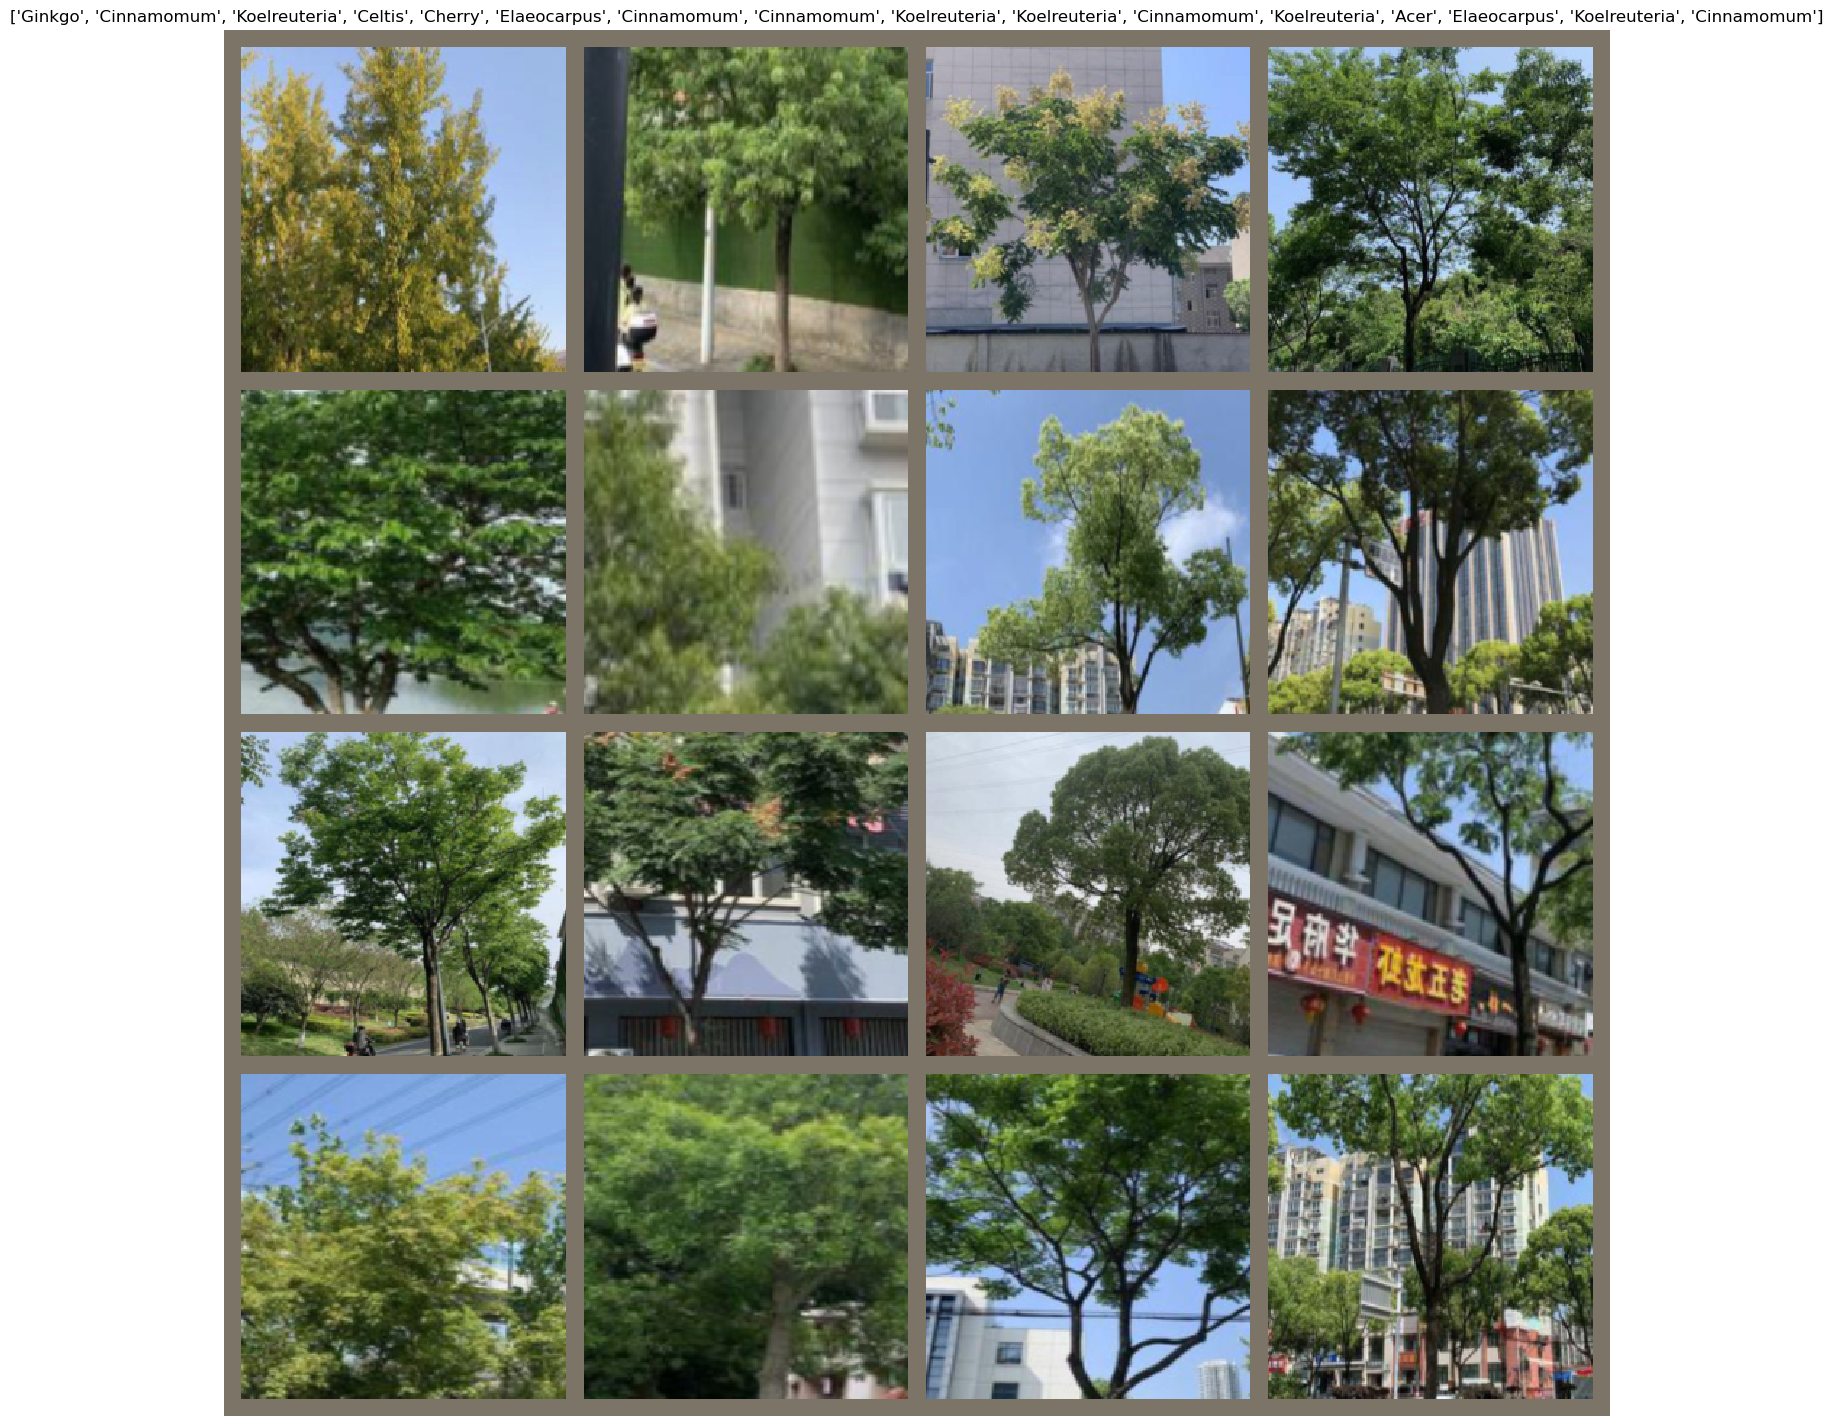

In [97]:
# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, nrow = 4, padding = 12 )

torch_imshow(out, title=[names_classes[x] for x in classes])

## Загрузка модели

### Загрузка из PyTorch

 Проверим ряд моделей из `torchvision.models`, список всех моделей можно найти, например, [тут](https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights).

Примеры вызова моделей.
```python
model = torchvision.models.resnet18(weights=         'ResNet18_Weights.IMAGENET1K_V1')
model = torchvision.models.efficientnet_b0(weights = 'EfficientNet_B0_Weights.IMAGENET1K_V1')
model = torchvision.models.densenet121(weights =     'DenseNet121_Weights.IMAGENET1K_V1')
model = torchvision.models.convnext_tiny(weights =   'ConvNeXt_Tiny_Weights.IMAGENET1K_V1')
model = torchvision.models.swin_v2_s(weights =       'Swin_V2_S_Weights.IMAGENET1K_V1')
model = torchvision.models.mobilenet_v2(weights =    'MobileNet_V2_Weights.IMAGENET1K_V1')
```

In [98]:
model = torchvision.models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')

* После загрузки модели нужно заморозить все параметры для экстрактора признаков. Для этого нам нужно установить `requires_grad = False`, чтобы заморозить параметры, чтобы градиенты не вычислялись в `backward()`. То есть такой мерой мы предотвращаем возможное переобучении модели. Для заморозки модели воспользуемся утилитой `freeze_model`.
* После того как сформирована фиксированная модель, можно приступить к разморозке и/или замене части слоев.
Как правило, оперируют только с головными слоями. Заменим последний головной полносвязный слой (`fc`) на свой, представляющий линейный слой с выходом, равным числу классов. Для этого используем утилиту `replace_last_linear_layer`.
* Проверим, сколько параметров будут учиться.


In [99]:
model = freeze_model(model)
model = replace_last_linear_layer(model, len(names_classes))
print_trainable_parameters(model)

trainable params: 513000 || all params: 11689512 || trainable%: 4.39


Обратите внимание, что в некоторых случаях головная часть может и не содержать линейного слоя.

In [100]:
model = torchvision.models.squeezenet1_0(weights=torchvision.models.squeezenet.SqueezeNet1_0_Weights.IMAGENET1K_V1)
*_, last = model.named_children()
print(last)

('classifier', Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))
  (2): ReLU(inplace=True)
  (3): AdaptiveAvgPool2d(output_size=(1, 1))
))


### Загрузка из TIMM

Часто моделей из `torchvision` не достаточно для полноценного исследования. Одним из наиболее популярных сегодня решений для задач классификации (и получения готовых [`feature extractor`](https://huggingface.co/docs/timm/feature_extraction)) является библиотека [`timm`](https://huggingface.co/timm). Предобученные [модели библиотеки timm](https://huggingface.co/models?pipeline_tag=image-classification&library=timm,pytorch&sort=trending) [обладают широким функционалом](https://huggingface.co/docs/timm/quickstart), в том числе для задач `transfer learning`. Библиотека содержит более $1000$ моделей и набор стандартных датасетов для их предобучения. 

Модели в `Timm` можно найти при помощи [поисковика hugging face](https://huggingface.co/models?pipeline_tag=image-classification&library=timm,pytorch&sort=trending) или функции  `list_models` как это показано ниже.

In [101]:
model_names = timm.list_models('*mobile*')
print(model_names[:15])#pprint(model_names[:15])

['mobilenetv2_035', 'mobilenetv2_050', 'mobilenetv2_075', 'mobilenetv2_100', 'mobilenetv2_110d', 'mobilenetv2_120d', 'mobilenetv2_140', 'mobilenetv3_large_075', 'mobilenetv3_large_100', 'mobilenetv3_rw', 'mobilenetv3_small_050', 'mobilenetv3_small_075', 'mobilenetv3_small_100', 'mobilevit_s', 'mobilevit_xs']


Проверим одну из моделей `TIMM`

In [102]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True, in_chans=3)

In [103]:
model = freeze_model(model)
model = replace_last_linear_layer(model, len(names_classes))
print_trainable_parameters(model)

trainable params: 1281000 || all params: 5483032 || trainable%: 23.36


### Загрузка из HF Hub

Экосистема [`Hugging Face`](https://huggingface.co) — это большое сообщество разработчиков инструментов, позволяющих пользователям создавать, обучать и внедрять модели машинного обучения на основе открытого кода и технологий. `Hugging Face` позволяет легко обмениваться инструментами, моделями, весами моделей и наборами данных между другими практикующими специалистами с помощью своего инструментария. 

С точки зрения решения задач компьютерного зрения в экосистеме `Hugging Face` можно выделить такие библиотеки, как:
* [`transformers`](https://huggingface.co/docs/transformers/index) — для работы с моделями на основе трансформеров и других современных подходов;
* [`diffusers`](https://huggingface.co/docs/diffusers/index) — для работы с моделями на основе диффузии;
* [`datasets`](https://huggingface.co/docs/datasets/en/index) — для работы с наборами данных;
* [`hub`](https://huggingface.co/docs/huggingface_hub/guides/download) — для работы с пользовательскими проектами;
* [`timm`](https://huggingface.co/docs/timm/feature_extraction) — рассматриваемый ранее проект работы с предобученными свертоными архитектурами и архитектурами-трансформерами для задач компьютерного зрения;
* [`optimum`](https://huggingface.co/docs/optimum/index) — проект по оптимизации моделей для различных типов вычислительных устройств;
* [`peft`](https://huggingface.co/docs/peft/main/en/index) — библиотека для эффективного файнтюнинга моделей при помощи таких алгоритмов, как [`LoRA`](https://huggingface.co/docs/peft/main/en/task_guides/image_classification_lora);
* [`evaluate`](https://huggingface.co/docs/evaluate/index) — библиотека основных метрик оценки результатов работы нейронных сетей.
* и многие другие.


Для каждого типа моделей в `transformers` предусмотрен свой тип загрузки. Так, для моделей `MobileViT` будем использовать `MobileViTForImageClassification`. В данном случае будет загружена предобученная модель `apple/mobilevit-small`, для которой предварительно были загружены преобразования. Оконечный слой модели будет заменен на новый, имеющий число выходов, равное количеству меток в наборе данных (аргумент `num_labels`). Также нужно передать `ignore_mismatched_sizes = True`, чтобы компенсировать изменение количества параметров в слое классификации.

In [104]:
model = MobileViTForImageClassification.from_pretrained(
    'apple/mobilevit-small',
    ignore_mismatched_sizes = True
)

In [105]:
model = freeze_model(model)
model = replace_last_linear_layer(model, len(names_classes))
print_trainable_parameters(model)

trainable params: 641000 || all params: 5578632 || trainable%: 11.49


### Перенос обучения

Теперь давайте все-таки перейдем к модели `squeezenet` из `torchvision`.

In [106]:
model = torchvision.models.squeezenet1_0(weights=torchvision.models.squeezenet.SqueezeNet1_0_Weights.IMAGENET1K_V1)
*_,last = model.named_children()
last

('classifier',
 Sequential(
   (0): Dropout(p=0.5, inplace=False)
   (1): Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))
   (2): ReLU(inplace=True)
   (3): AdaptiveAvgPool2d(output_size=(1, 1))
 ))

In [107]:
def get_squeezenet_1_0(n_classes ):
    model = torchvision.models.squeezenet1_0(weights=torchvision.models.squeezenet.SqueezeNet1_0_Weights.IMAGENET1K_V1)
    model = freeze_model(model)
    # UNUSUAL LAYER
    model.classifier[1] = nn.Conv2d(512, n_classes, kernel_size=(1, 1), stride=(1, 1))
    # INIT LAYER PARAMETERS
    nn.init.xavier_uniform_(model.classifier[1].weight)
    model.classifier[1].bias.data.fill_(0)
    return model

model = get_squeezenet_1_0(len(names_classes))
print_trainable_parameters(model)

trainable params: 4617 || all params: 740041 || trainable%: 0.62


In [108]:
summary(model, (1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
SqueezeNet                               [1, 9]                    --
├─Sequential: 1-1                        [1, 512, 13, 13]          --
│    └─Conv2d: 2-1                       [1, 96, 109, 109]         (14,208)
│    └─ReLU: 2-2                         [1, 96, 109, 109]         --
│    └─MaxPool2d: 2-3                    [1, 96, 54, 54]           --
│    └─Fire: 2-4                         [1, 128, 54, 54]          --
│    │    └─Conv2d: 3-1                  [1, 16, 54, 54]           (1,552)
│    │    └─ReLU: 3-2                    [1, 16, 54, 54]           --
│    │    └─Conv2d: 3-3                  [1, 64, 54, 54]           (1,088)
│    │    └─ReLU: 3-4                    [1, 64, 54, 54]           --
│    │    └─Conv2d: 3-5                  [1, 64, 54, 54]           (9,280)
│    │    └─ReLU: 3-6                    [1, 64, 54, 54]           --
│    └─Fire: 2-5                         [1, 128, 54, 54]       

# Подготовка и обучение модели в `Pytorch Lighting`

В этом примере мы создадим модель в фреймворке `PyTorch Lighting` как объект класса `ModelPL`.

In [118]:
class ModelPL(pl.LightningModule):
    def __init__(self, lr=0.01, n_classes = 9):
        super().__init__()
        
        self.lr = lr
        self.n_classes = n_classes
        
        self.set_model(model)
       
        self.criterion = nn.CrossEntropyLoss()
        
        self.val_accuracy   = Accuracy(task="multiclass", num_classes=self.n_classes)
        self.test_accuracy  = Accuracy(task="multiclass", num_classes=self.n_classes)
        self.save_hyperparameters(ignore=['model'])

    def set_model(self, torch_model  = None):
        self.model = torch_model
        return self

    def forward(self, x):
        x = self.model(x)
        return x        
        
    def any_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = self.criterion(logits, y)
        preds = torch.argmax(logits, dim=1)
        return preds, loss        
    
    def training_step(self, batch, batch_idx):
        _, loss = self.any_step(batch, batch_idx)
        self.log("train_loss", loss)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        preds, loss = self.any_step(batch, batch_idx)
        
        self.val_accuracy.update(preds, y)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", self.val_accuracy, prog_bar=True)

    def test_step(self, batch, batch_idx):
        x, y = batch
        preds, loss = self.any_step(batch, batch_idx)
        
        self.val_accuracy.update(preds, y)
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.val_accuracy, prog_bar=True)
        
    def predict_step(self, batch, batch_idx, dataloader_idx=0):
        return self(batch)
        
    def configure_optimizers(self):
        opt = torch.optim.Adam(self.model.parameters(), lr = self.lr)
        return opt

In [119]:
model = get_squeezenet_1_0(len(names_classes))
modelpl = ModelPL(lr = 0.001, n_classes = len(names_classes)).set_model(model)

Мы воспользуемся предобученной моделью.

Модель можно обучить самостоятельно:
```python
trainer = pl.Trainer(max_epochs=30,  logger=logger,)
trainer.fit(model=modelpl, train_dataloaders=train_loader, val_dataloaders = val_loader)
print(trainer.test(modelpl, dataloaders=test_loader, ))
trainer.save_checkpoint("best_model_squeeze.pt", weights_only=False)
```

In [121]:
trainer = pl.Trainer(max_epochs=30,  logger=logger,)
trainer.fit(model=modelpl, train_dataloaders=train_loader, val_dataloaders = val_loader)
print(trainer.test(modelpl, dataloaders=test_loader, ))
trainer.save_checkpoint("best_model_squeeze.pt", weights_only=False)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name          | Type               | Params | Mode 
-------------------------------------------------------------
0 | model         | SqueezeNet         | 740 K  | train
1 | criterion     | CrossEntropyLoss   | 0      | train
2 | val_accuracy  | MulticlassAccuracy | 0      | train
3 | test_accuracy | MulticlassAccuracy | 0      | train
-------------------------------------------------------------
4.6 K     Trainable params
735 K     Non-trainable params
740 K     Total params
2.960     Total estimated model params size (MB)
71        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=1` reached.
C:\Users\Ronkin\anaconda3_1\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.47863247990608215    │
│         test_loss         │    1.5885965824127197     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.5885965824127197, 'test_acc': 0.47863247990608215}]


In [122]:
if not os.path.exists('best_model_squeeze.pt' ):
    url = "https://github.com/MVRonkin/Deep-Learning-Foundation-Course/raw/refs/heads/main/2024_Demo/best_model_squeeze.pt"
    filename, headers = urllib.request.urlretrieve(url,filename='best_model_squeeze.pt' )

Для демонстрации дообучим модель на 1 эпохе.

In [124]:
modelpl = ModelPL.load_from_checkpoint('best_model_squeeze.pt')
trainer = pl.Trainer(max_epochs=31, logger=logger,)
trainer.fit(model=modelpl, train_dataloaders=train_loader, val_dataloaders = val_loader, ckpt_path = "best_model_squeeze.pt")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\Ronkin\anaconda3_1\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:654: Checkpoint directory D:\data\Log\lightning_logs\version_18\checkpoints exists and is not empty.
Restoring states from the checkpoint path at best_model_squeeze.pt

  | Name          | Type               | Params | Mode 
-------------------------------------------------------------
0 | model         | SqueezeNet         | 740 K  | eval 
1 | criterion     | CrossEntropyLoss   | 0      | train
2 | val_accuracy  | MulticlassAccuracy | 0      | train
3 | test_accuracy | MulticlassAccuracy | 0      | train
-------------------------------------------------------------
4.6 K     Trainable params
735 K     Non-trainable params
740 K     Total params
2.960     Total estimated model params size (MB)
3         Modules in train mode
68        Modules in eval mode
Restored all states from the 

Sanity Checking: |                                                                               | 0/? [00:00<…

C:\Users\Ronkin\anaconda3_1\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
C:\Users\Ronkin\anaconda3_1\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=2` reached.


Протестируем модель


In [125]:
test_acc = trainer.test(modelpl, dataloaders=test_loader, )
print(test_acc)

C:\Users\Ronkin\anaconda3_1\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Testing: |                                                                                       | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     0.561253547668457     │
│         test_loss         │    1.3397594690322876     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.3397594690322876, 'test_acc': 0.561253547668457}]


Модель можно выложить в чистый `Torch` если необходимо.

In [127]:
model_torch = modelpl.model

Теперь проведем предсказание для одного батча и посмотри на точность результатов

In [128]:
# PREDICT
x,y = next(iter(test_loader))
with torch.inference_mode():
    y_pred = model_torch(x)

# ACCURACY
y_pred = torch.argmax(y_pred,dim=1)
torch.eq(y.cpu(),y_pred).sum()/y.numel()

tensor(0.7500)

In [129]:
print(os.listdir(os.path.join(logger.root_dir)))

['version_0', 'version_1', 'version_10', 'version_11', 'version_12', 'version_13', 'version_14', 'version_15', 'version_16', 'version_17', 'version_18', 'version_2', 'version_3', 'version_4', 'version_5', 'version_6', 'version_7', 'version_8', 'version_9']


In [132]:
os.listdir(os.path.join(logger.root_dir,  'version_18'))

['checkpoints', 'hparams.yaml', 'metrics.csv']

In [133]:
df = pd.read_csv(os.path.join(logger.root_dir,  'version_18', 'metrics.csv'))
df

epoch  step  test_acc  test_loss  train_loss   val_acc  val_loss
0       0    49       NaN        NaN    1.953011       NaN       NaN
1       0    93       NaN        NaN         NaN  0.400000  1.806209
2       1    99       NaN        NaN    2.009549       NaN       NaN
3       1   149       NaN        NaN    1.756945       NaN       NaN
4       1   187       NaN        NaN         NaN  0.500000  1.575609
..    ...   ...       ...        ...         ...       ...       ...
89      1    94  0.478632   1.588597         NaN       NaN       NaN
90      1    99       NaN        NaN    1.243233       NaN       NaN
91      1   149       NaN        NaN    1.841500       NaN       NaN
92      1   187       NaN        NaN         NaN  0.589474  1.270352
93      2   188  0.561254   1.339759         NaN       NaN       NaN

[94 rows x 7 columns]

In [134]:
n_classes = len(names_classes)
labels, predicts, probs = eval_macro(model, test_loader, n_classes)
class_correct, class_total = eval_micro(labels, predicts, n_classes)

for i in range(n_classes):
    print(f'Accuracy of {names_classes[i]}\t\t:{100 * class_correct[i] / class_total[i]:.1f}%' )

eval_macro:   0%|          | 0/22 [00:00<?, ?it/s]

Accuracy of Acer		:80.5%
Accuracy of Cedrus		:80.6%
Accuracy of Celtis		:39.5%
Accuracy of Cherry		:30.4%
Accuracy of Cinnamomum		:80.7%
Accuracy of Elaeocarpus		:22.7%
Accuracy of Ginkgo		:80.0%
Accuracy of Koelreuteria		:23.2%
Accuracy of Lagerstroemia		:75.0%


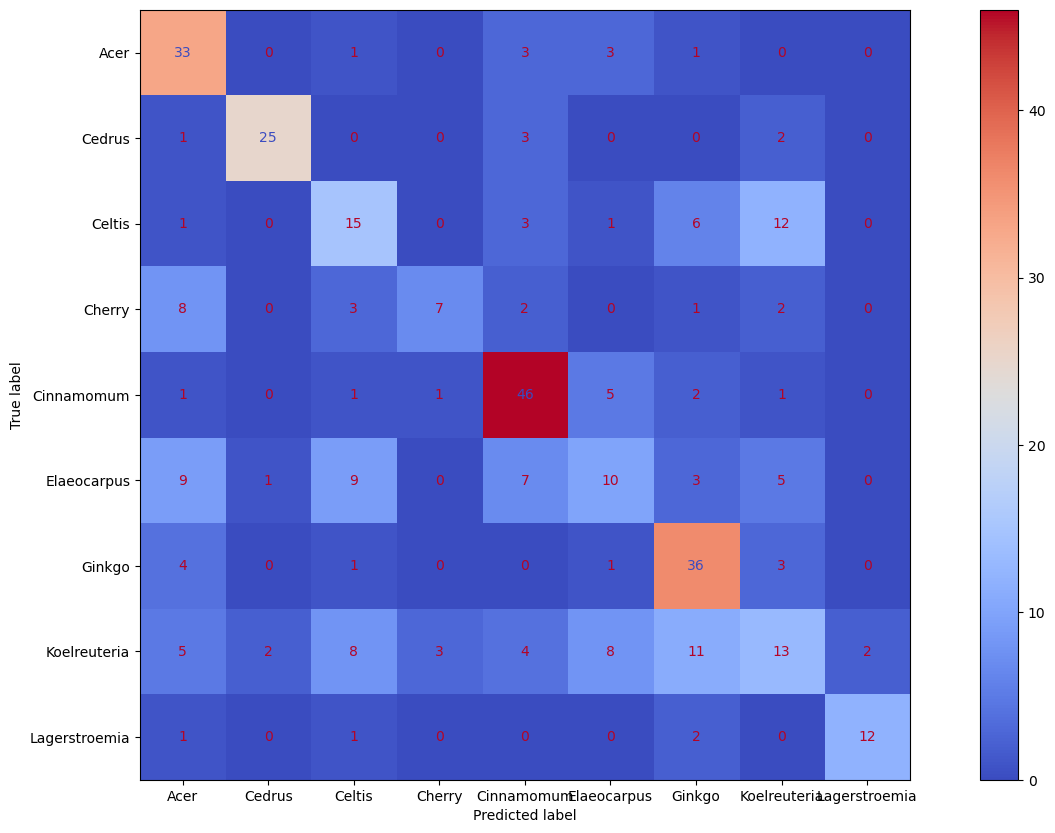

In [135]:
plot_confusion_matrix(labels, predicts, names_classes,figsize=(18, 10))

In [136]:
incorrect = eval_incorrect(labels, predicts, probs, test_data)

eval_incorrect: 0it [00:00, ?it/s]

In [137]:
def eval_incorrect(labels, predicts, probs, data):
    incorrect_examples = []
    corrects = torch.eq(labels, predicts)
    for image, label, prob, correct in tqdm(zip(data, labels, probs, corrects), desc="eval_incorrect", leave=False):
        if not correct:
            incorrect_examples.append((image, label, prob))    

    incorrect_examples.sort(reverse=True,
                            key=lambda x: torch.max(x[2], dim=0).values)
    return incorrect_examples

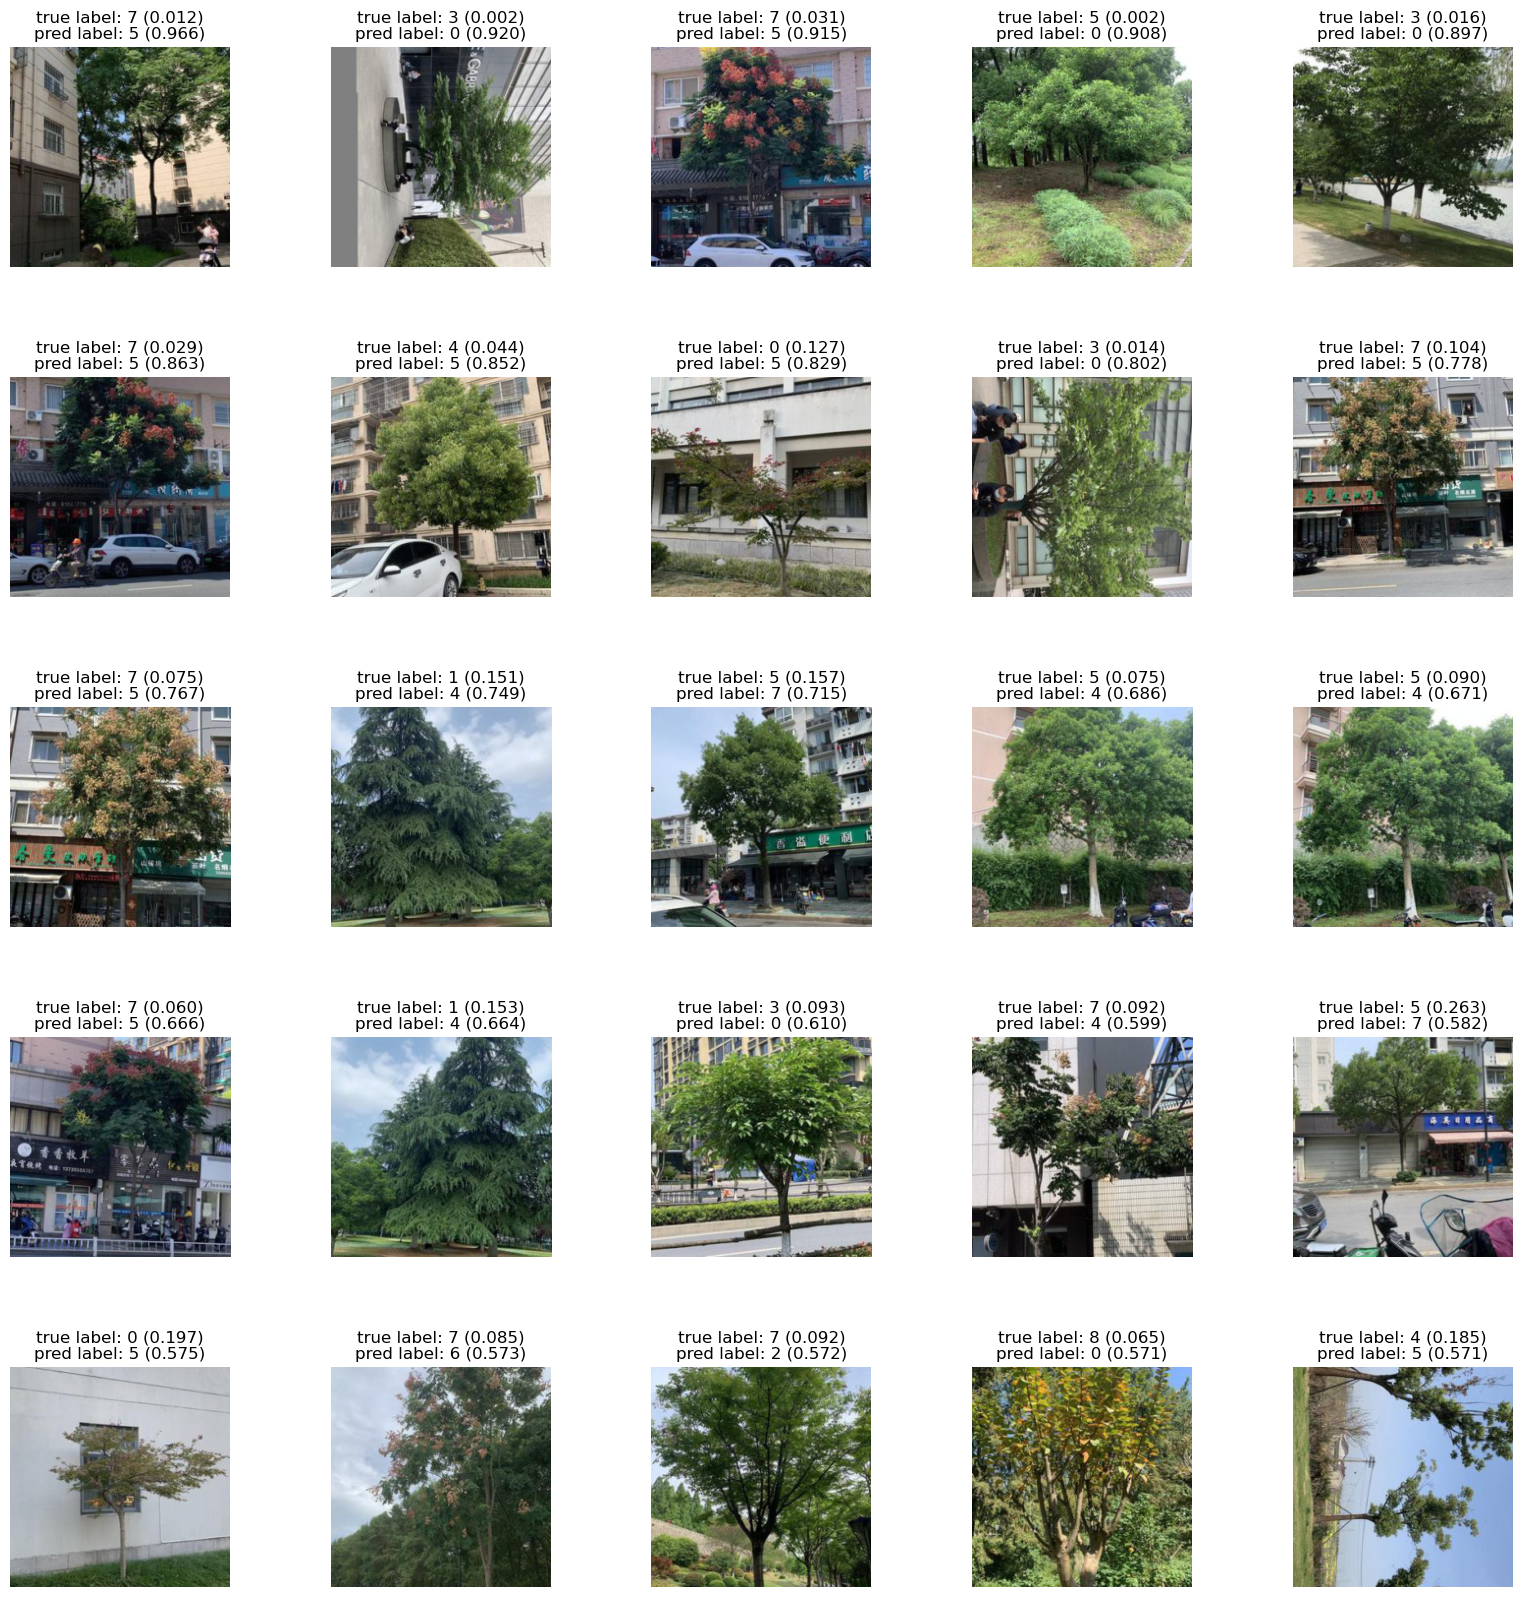

In [138]:
N_IMAGES = 25
plot_most_incorrect(incorrect, N_IMAGES)